# Midterm IS2002B. Student ID: xxxxxx
## General comments 
This Midterm integrates knowledge and skills acquired in the first half of the semester, especially in the last 6 Assignments. You are allowed to use any document and source on your computer and look up documents on the internet. You or not allowed to share documents, or communicate in any other way with people inside or outside the class room during the midterm. To finish the midterm in the alloted 2 hrs, you will have to work fast and efficiently. Good luck!
## Preliminaries
Sets up the environment by importing pandas, numpy, and matplotlib. Because we are using plots make sure that you configure your notebook such that plots are shown inline (see Assignment 2). 

In [2]:
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt 
%matplotlib inline
import scipy.stats as ss
import pandas as pd 
import numpy as np
import seaborn as sb

## Data set 
The data set for the midterm is a *random* sample of 377 observations from the US 2000 census. A census is a survery of the entire population of the US, conducted every 10 years. 16% of the population (selected at random) also fill out a long-form. The present data comes from these long-form respondents. 

The data frame contains the data
- censusYear:		Census Year.
- state:			Name of state.
- area:             Rough geographic area of the state (east, north, west, & south) 
- familyIncome: 	Total family income (in U.S. dollars).
- age: 			    Age (years)
- sex: 			    Sex with levels Female and Male.
- raceGeneral: 	    Race with levels White, Black, Other 
- maritalStatus: 	Marital status with levels Divorced, Married, Single, and Widowed.
- personalIncome:  	Total personal income (in U.S. dollars). 

https://en.wikipedia.org/wiki/2000_United_States_Census


## Task 1: Geographic area and race (35pt)
In this task you will explore the connection between the geographic area: 
- West: Western states
- East: upper East coast
- South: Deep south and southern east cost + Texas
- North: The upper midwest

and the general race (white, black, other). 

### Question 1 (8pt)
Generate a table with the conditional probabilities of being of white, black or other racial background (raceGeneral), given that the respondent lived in the north, south, west and east (area). Then generate a plot that  is ideally suited to let you compare the relative racial proportions of people in each area. Remember to provide axis lables and a caption. Written answer: Which proportions appears larger for a particular area than for any of the others?  

In [32]:
df = pd.read_csv('census.csv')


In [34]:
T = pd.crosstab(df.area, df.raceGeneral, normalize='index')
T

raceGeneral,Black,Other,White
area,,,
east,0.166667,0.114035,0.719298
north,0.036585,0.073171,0.890244
south,0.205357,0.044643,0.750000
west,0.028986,0.347826,0.623188


Text(0, 0.5, 'Proportion')

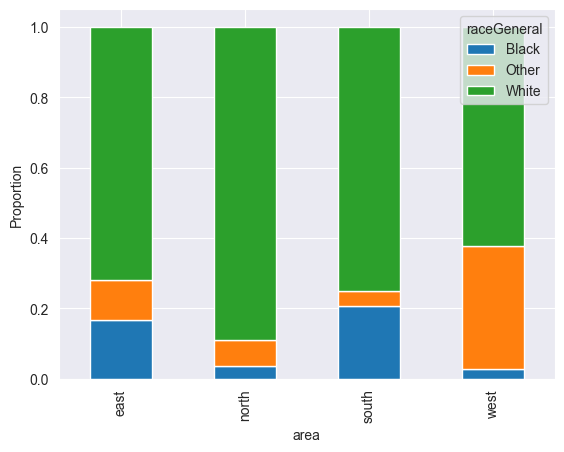

In [35]:
T.plot(kind='bar', stacked=True)
plt.ylabel('Proportion')

proportion of white people appear larger in the north than any other area. the "other" category is higher in the west than any other region.

### Question 2 (5pt)
What measurement scale does area, raceGeneral, and personalIncome have?    

area and raceGeneral are nominal, personalIncome is ratio scale

### Question 3 (5pt)
We want to test the hypothesis that the proportion of white people is different in the western states (area = 'west') than in the eastern states (area = 'east). Formulate precisely the null hypothesis and the alternative hypothesis. To test this idea, will you have to conduct a one-sided or two-sided test? 

In [5]:
# h0: pop_white_west = pop_white_east
# h1: pop_white_west != pop_white_west

# two sided test, since it can go in either direction

### Question 4 (10pt)
Decide on an appropriate statistic to use to test the hypothesis forumlated in Q3. Then perform a randomization test to test whether you can reject the Null-hypothesis. Your code should produce a figure, which shows the distribution of your chosen test statistics under the Null hypothesis, as well as the empirical value as a vertical line.  Remember to provide axis lables and a caption. Written answer: Report the value of the statistics and the associated p-value, using at least 1000 iterations. What do you conclude regarding the hypotheses formulated above? 

0.09610983981693366

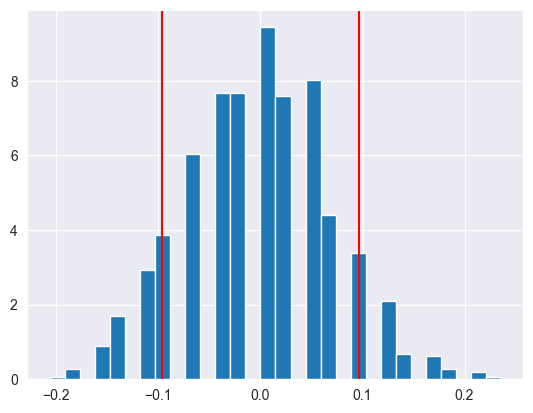

In [36]:
filtered_df = df[df['area'].isin(['west', 'east'])]

full_ct = pd.crosstab(filtered_df['raceGeneral'], filtered_df['area'])
totals = full_ct.sum(axis=0)
ct = pd.DataFrame({
    'White': full_ct.loc['White'],
    'Other': totals - full_ct.loc['White']
}).T

east_prop = ct['east']['White'] / (ct['east']['Other'] + ct['east']['White'])
west_prop = ct['west']['White'] / (ct['west']['Other'] + ct['west']['White'])

obs_diff_prop = abs(east_prop - west_prop)

all_white = [1] * (ct['east']['White'] + ct['west']['White']) + [0] * (ct['east']['Other'] + ct['west']['Other'])

def randomization_test(data, test_statistic, n=1000):
    test_stats = []
    for _ in range(n):
        np.random.shuffle(data)
        east = data[:ct['east']['White'] + ct['east']['Other']]
        west = data[ct['east']['White'] + ct['east']['Other']:]
        test_stats.append(abs(test_statistic(east)) - abs(test_statistic(west)))
    return test_stats

test_stats = randomization_test(all_white, np.mean, n=1000)

plt.hist(test_stats, density=True, bins=30)
plt.axvline(obs_diff_prop, color='red')
plt.axvline(-obs_diff_prop, color='red')
obs_diff_prop


based on the permutation test, we can 

### Question 5 (7pt)
Based on the results from Question 4, a news outlet publishes the following headline: "New study finds that racial diversity is equal on east and west coast of the US". What are possible problems with this claim? 

the study only looks at a small sample of the population. it also only looks at the proportion of white people to the rest of the population and doesn't consider other races. the population of states also are not considered, and we don't know how randomly people were surveyed.

In [7]:
# 

## TASK 2: Racial inequality in annual income (27pt)
### Question 1 (10pt)
Generate a visualisation of personal income depending on the general racial background of the person (White, Black, Other). The visualization should show medians, quartiles and let you make some inference about the shape of the distribution.  Remember to provide axis lables and a caption. Written answer: What is the shape of the distribution for the personalIncome based on your plot? Which racial category earns the most? Which one the least? 

<Axes: xlabel='raceGeneral', ylabel='personalIncome'>

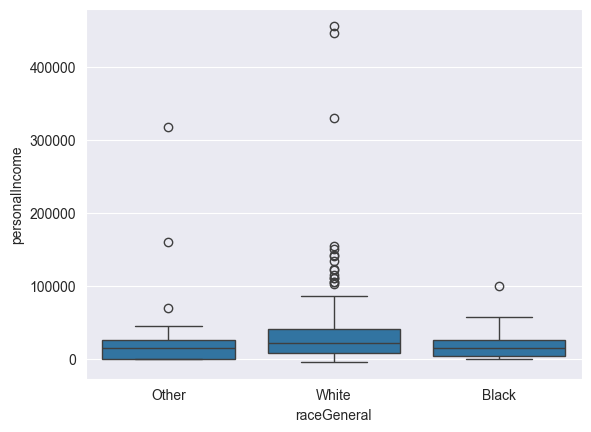

In [37]:
sb.boxplot(x='raceGeneral', y='personalIncome', data=df)

shape for all distributions is strongly right skewed, median is highest for white and lowest for black people.

### Question 2 (10pt)
Using a bootstrap, determine the *median* personal income and the 95% confidence interval for the median for white people and for black people seperately. Each bootstrap sample should contain as many data points as are in the sample. Tip 1: Write a function and then call it with the data of personal income for black and white people separately. 
Tip 2: You can get the number of elements in a data Series with data.shape[0] 

### Question 3 (7pt)
Is the confidence interval for the median income larger for white or black people? Why? 

## Task 3: Testing for a north-south income difference (38pt)
### Question 1 (8pt)
Make a violin plot of the personalIncome (y-variable), depending on the geographic area (x-variable).  Remember to provide axis lables and a caption. What do you see if you compare incomes in the south and the north of the US? How do the means compare? How do the medians compare? Why do these two statistics apparently give you different answers?  

### Question 2: Hypotheses (5pt)
Test the hypothesis that the *median* personal income in the south is *lower* than in in the north. Formulate the null- and alternative hypotheses. 

### Question 3: Randomization test (10pt)
Use the difference in medians between north and south as your test statistics. Then perform a randomisation test to test the null-hypothesis. When doing so, restrict the analysis and the randomisation test to data that comes from people in the north and south (excluding "east" and "west"). Conduct a one- or two-sided test (as appropriate for the hypothesis).  What can you conclude? 

### Question 4: Standard deviation of bootstrap samples (5pt)

Modify your randomization function, such that it prints out the standard deviation of the median differences under the null-hypothesis. 

### Question 5: Bayesian hypothesis testing (10pt)
Using the normal approximation, conduct a Bayesian hypothesis test of the null vs. alternative hypothesis formulated in question 2. For the null hypothesis, assume that the median difference has a mean of 0 and a SD of the that you found in Question 4. for the alternative hypothesis assume that the median income in the north is 10000 USD higher than in the south, again using the SD from Question 4. Starting from equal prior probabilities, report the BF and the posterior probability for the Null-hypothesis. Comment your code to show your calculations. Written answer: What do you conclude?  